<a href="https://colab.research.google.com/github/worldofaryavart/colab_notebooks/blob/colabnotebook/pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
# Pytorch workflow
import torch
from torch import nn # nn contains all of Pytorch building blocks for neural networks
import matplotlib.pyplot as plt
# Check PyTroch version
torch.__version__

'2.3.0+cu121'

###Data ( Preparing and loading)

In [260]:
# Create  *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [261]:
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Split data into training and test sets

In [262]:
# Create  a trining and test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

###Visualizing the data

In [263]:
#visualize the data
def plot_prediction(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot testting data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show te labels
  plt.legend(prop = {'size':14})

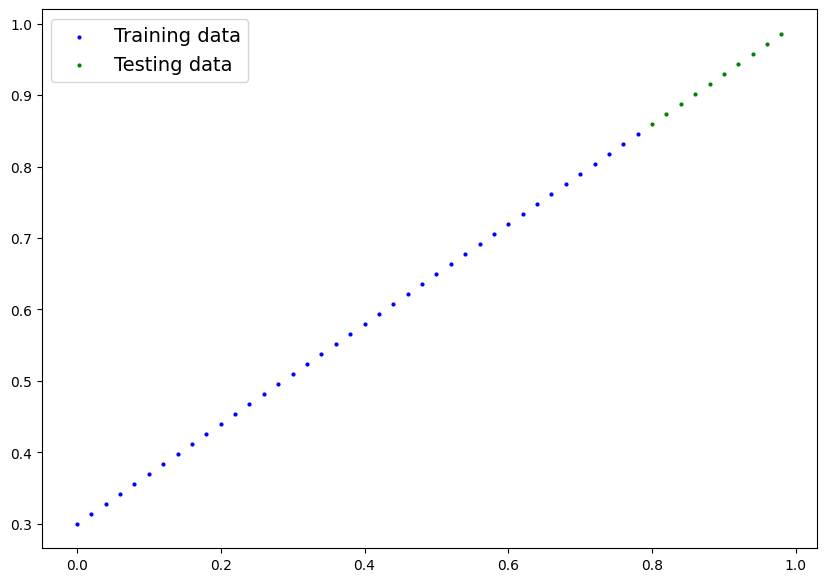

In [264]:
plot_prediction()

### building a model

In [265]:
class LinearRegressionModel(nn.Module):
  """creating a LinearRegressionClass"""
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x: torch.Tensor) -> torch.Tensor :
    return self.weights * x + self.bias

### Pytorch model building essentials

In [266]:
#create a random seed
torch.manual_seed(42)

#create a model
model_0 = LinearRegressionModel()

#check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [267]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [268]:
 # Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

with torch.no_grad():
  y_preds = model_0(X_test)

In [269]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

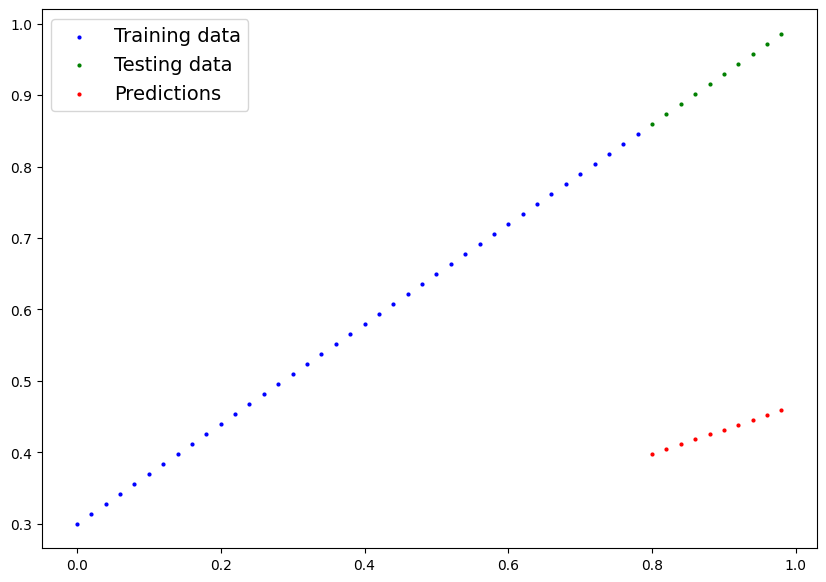

In [270]:
plot_prediction(predictions = y_preds)

### Train model

In [271]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [272]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [273]:
 # setup a loss function

loss_fn = nn.L1Loss()

 # setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                             lr = 0.01)

### Building a training loop

In [274]:
torch.manual_seed(42)

# an epoch is one loop through the data
epochs = 200

# Tracking values
epoch_count = []
loss_values = []
test_loss_values = []

# Training loop
for epoch in range(epochs):
  # setting the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Epoch: {epoch} | Loss: {loss}")

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Test loss: {test_loss}")
    print(model_0.state_dict())

Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Test loss: 0.0805937647819519
OrderedDict([('weights', tensor([0.5288])), ('bias', tensor([0.3718]))])
Test loss: 0.07232122868299484
OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))])
Test loss: 0.06473556160926819
OrderedDict([('weights', tensor([0.

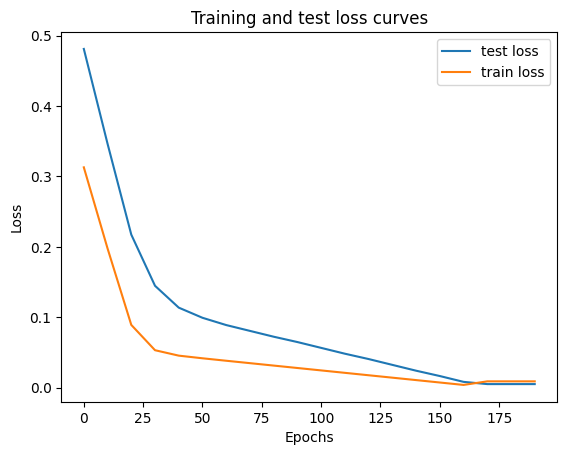

In [275]:
plt.plot(epoch_count,test_loss_values, label ="test loss")
plt.plot(epoch_count,loss_values, label ="train loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [276]:
with torch.inference_mode():
  y_preds = model_0(X_test)

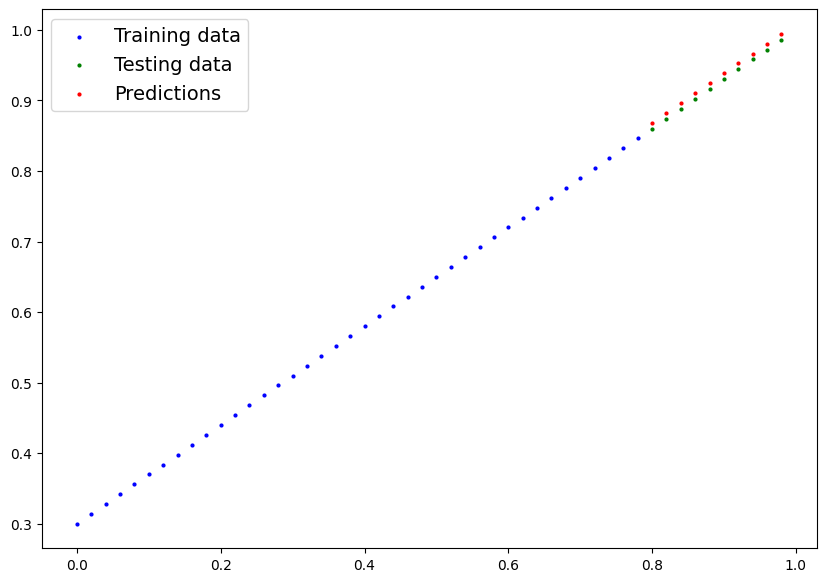

In [277]:
plot_prediction(predictions = y_preds)

## Saving a model in Pytorch

In [278]:
#Saving the model in Pytorch
from pathlib import Path

# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "1_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/1_pytorch_workflow_model_0.pth


###Loading a Model

In [279]:
import torch

# Define the model architecture
loaded_model_0 = LinearRegressionModel()

# Load the saved state dict
try:
    loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
    loaded_model_0.eval()
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")


Model loaded successfully.


In [280]:
#make prediction from our loaded model
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [281]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together


In [282]:
import torch
import matplotlib.pyplot as plt
from pathlib import Path

####Data

In [283]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

#### splitting the data

In [284]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

#### Building the model


In [285]:
class LinearRegressionModelV2(nn.Module):
  """creating a LinearRegressionClass"""
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor :
    return self.linear_layer(x)

#### Prepare to train

In [286]:
#create a random seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                             lr = 0.01)

####Building a training loop


In [287]:
torch.manual_seed(42)

#setting up the epochs
epochs = 200

# Tracking values
epoch_count = []
loss_values = []
test_loss_values = []

#training the loop
for epoch in range(epochs):
  # setting the model to training mode
  model_1.train()
  # 1. Forward pass
  y_pred = model_1(X_train)
  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Epoch: {epoch} | Loss: {loss}")
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Loss backward
  loss.backward()
  # 5. Optimizer step
  optimizer.step()
  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Test loss: {test_loss}")
    print(model_1.state_dict())
    print(f"Model parameters: {list(model_1.parameters())}")



Test loss: 0.5739762187004089
OrderedDict([('linear_layer.weight', tensor([[0.7606]])), ('linear_layer.bias', tensor([0.8200]))])
Model parameters: [Parameter containing:
tensor([[0.7606]], requires_grad=True), Parameter containing:
tensor([0.8200], requires_grad=True)]
Test loss: 0.4392663538455963
OrderedDict([('linear_layer.weight', tensor([[0.7216]])), ('linear_layer.bias', tensor([0.7200]))])
Model parameters: [Parameter containing:
tensor([[0.7216]], requires_grad=True), Parameter containing:
tensor([0.7200], requires_grad=True)]
Test loss: 0.30455657839775085
OrderedDict([('linear_layer.weight', tensor([[0.6826]])), ('linear_layer.bias', tensor([0.6200]))])
Model parameters: [Parameter containing:
tensor([[0.6826]], requires_grad=True), Parameter containing:
tensor([0.6200], requires_grad=True)]
Test loss: 0.16984674334526062
OrderedDict([('linear_layer.weight', tensor([[0.6436]])), ('linear_layer.bias', tensor([0.5200]))])
Model parameters: [Parameter containing:
tensor([[0.643

#### Saving the model

In [288]:
# Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "1_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/1_pytorch_workflow_model_1.pth


In [289]:
loaded_model_0 = LinearRegressionModel()

# Load the saved state dict
try:
    loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
    loaded_model_0.eval()
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")

Model loaded successfully.


In [290]:
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])